In [2]:
import nltk
import pandas as pd
import numpy as np
from lyricsgenius import Genius
from nltk.corpus import wordnet
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
client_access_token = "Z3u3rLvxxvbdSNOItyy-u0IZ60q-5JQqMj_sVIo2tyggpxAk3xPBGSBJMwKlQEeI"

/home/plasma/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
[nltk_data] Downloading package wordnet to /home/plasma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/plasma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/plasma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
df = pd.read_csv('muse_v3.csv').astype({'valence_tags': np.float32, 'arousal_tags':np.float32, 'dominance_tags':np.float32})
df['lyrics'] = ""
df['lemma_lyrics'] = ""
df['textblob_sent'] = 0.0
df['textblob_sent_lemma'] = 0.0
df['vader_sent'] = 0.0
df['vader_sent_lemma'] = 0.0
df['flair_sent'] = 0.0
df['flair_sent_lemma'] = 0.0
df[:10]

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,,,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,,,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,,,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,,,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771177,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,,,0.0,0.0,0.0,0.0,0.0,0.0
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal,,,0.0,0.0,0.0,0.0,0.0,0.0
6,https://www.last.fm/music/kanye%2bwest/_/feedback,Feedback,Kanye West,['aggressive'],1,3.080000,5.870000,5.490000,NaN,49fT6owWuknekShh9utsjv,hip-hop,,,0.0,0.0,0.0,0.0,0.0,0.0
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,"['aggressive', 'angry']",10,3.807121,5.473939,4.729091,1a826083-5585-445f-a708-415dc90aa050,6DoXuH326aAYEN8CnlLmhP,nu metal,,,0.0,0.0,0.0,0.0,0.0,0.0
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"['aggressive', 'angry', 'bitter']",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,104YdibC7VQy78xAVmgRYr,singer-songwriter,,,0.0,0.0,0.0,0.0,0.0,0.0
9,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,['aggressive'],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,5fU6qjmD38P90BMsuqpiuU,metal,,,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['genre'].nunique()

811

In [34]:
print("'")

'


In [109]:
sent = TextBlob("adshkbd ahjdba wdjh daih adhas djhad ajhsd asjdh asd aisdh asjhd ").sentiment
print(sent.polarity)


0.0


In [116]:
vader_analyzer = SentimentIntensityAnalyzer()
vader_analyzer.polarity_scores("I hate dogs so much")['compound']

-0.5719

In [31]:
genres = set()
for genre in df['genre']:
    genres.add(genre)
print(genres)

{nan, 'gypsy', 'industrial techno', 'witch house', 'street punk', 'stoner rock', 'underground rap', 'salsa', 'russian pop', 'electro', 'melodic metal', 'contemporary classical', 'bossa nova', 'children', 'glam punk', 'rock en espanol', 'christian dance', 'acoustic', 'scottish indie', 'library music', 'new romantic', 'fingerstyle', 'cabaret', 'lullaby', 'speed metal', 'new wave', 'american primitive', 'chillwave', 'contemporary jazz', 'polish black metal', 'screamo', 'drill', 'jazz fusion', 'space rock', 'klezmer', 'jazz funk', 'mathcore', 'jazz rock', 'afrobeat', 'supergroup', 'melodic hardcore', 'hands up', 'balafon', 'qawwali', 'avant-rock', 'parody', 'grunge', 'exotica', 'korean pop', 'modern rock', 'schlager', 'bluegrass', 'ambient trance', 'soundtrack', 'german hip hop', 'nasheed', 'tekno', 'dirty south rap', 'guqin', 'latin pop', 'celtic rock', 'russian chanson', 'underground hip hop', 'opera', 'anthem', 'latino', 'contemporary country', 'folk punk', 'christian metalcore', 'ninte

In [153]:
def get_flair_sentiment(text, classifier):
    sentences = nltk.tokenize.sent_tokenize(text)
    sentiment = 0
    for sentence in sentences:
        flair_sentence = Sentence(sentence)
        classifier.predict(flair_sentence)
        dictionary = flair_sentence.to_dict()
        if dictionary['labels'][0]['value'] == 'POSITIVE':
            sentiment += dictionary['labels'][0]['confidence']
        else:
            sentiment += (-1*(dictionary['labels'][0]['confidence']))
    return sentiment/len(sentences)

In [154]:
def tag_to_wordnet(tag):
    if tag[0] == ('J') or tag[0] == 's':
        return wordnet.ADJ
    if tag[0] == ('V'):
        return wordnet.VERB
    if tag[0] == ('N'):
        return wordnet.NOUN
    if tag[0] == ('R'):
        return wordnet.ADV
    return None

In [155]:

def preprocess_lyrics(lyrics, lemmatizer):
    words = nltk.word_tokenize(lyrics)
    tagged_words = nltk.pos_tag(words)
    lemmatized_words = []
    for word,tag in tagged_words:
        if word:
            wordnet_tag = tag_to_wordnet(tag)
            if wordnet_tag:
                lemmatized_words.append(lemmatizer.lemmatize(word,wordnet_tag))
            else:
                lemmatized_words.append(lemmatizer.lemmatize(word))
    return " ".join(lemmatized_words)

In [156]:
print(preprocess_lyrics("I looked into the water and waved at the reflection!",nltk.stem.WordNetLemmatizer()))

I look into the water and wave at the reflection !


In [16]:
artist = df.iloc[0]['artist']
track = df.iloc[0]['track']

In [18]:
genius = Genius(client_access_token)
song = genius.search_song(track,artist)
print(song.lyrics)

Searching for "'Till I Collapse" by Eminem...
Done.
[Intro: Eminem]
'Cause sometimes you just feel tired
Yo, left, yo, left
Feel weak and when you feel weak
Yo, left, right, left
You feel like you wanna just give up
Yo, left, yo left
But you gotta search within you
Yo, left, right, left
Try to find that inner strength and just pull that shit out of you
Yo, left, yo left
And get that motivation to not give up
Yo, left, right, left
And not be a quitter, no matter how bad
Yo, left, yo left
You wanna just fall flat on your face and collapse
Yo, left, right, left

[Verse 1: Eminem]
'Til I collapse I'm spillin' these raps long as you feel 'em
'Til the day that I drop you'll never say that I'm not killin' 'em
‘Cause when I am not, then I'ma stop pennin' 'em
And I am not hip-hop and I'm just not Eminem
Subliminal thoughts, when I'ma stop sendin' 'em?
Women are caught in webs, spin 'em and hock venom
Adrenaline shots of penicillin could not get the illin' to stop
Amoxicillin's just not real eno

In [93]:
#test lemmatization
artist = df.iloc[0]['artist']
track = df.iloc[0]['track']
lyrics = genius.search_song(track,artist).lyrics
print(preprocess_lyrics(lyrics,nltk.stem.WordNetLemmatizer()))

Searching for "'Till I Collapse" by Eminem...
Done.
Intro Eminem 'Cause sometimes you just feel tired Yo leave yo leave Feel weak and when you feel weak Yo leave right leave You feel like you wan na just give up Yo leave yo leave But you get ta search within you Yo leave right leave Try to find that inner strength and just pull that shit out of you Yo leave yo leave And get that motivation to not give up Yo leave right leave And not be a quitter no matter how bad Yo leave yo leave You wan na just fall flat on your face and collapse Yo leave right leave Verse 1 Eminem 'Til I collapse I 'm spillin these rap long a you feel 'em 'Til the day that I drop you 'll never say that I 'm not killin 'em ‘ Cause when I be not then I'ma stop pennin 'em And I be not hip-hop and I 'm just not Eminem Subliminal thought when I'ma stop sendin 'em Women be catch in web spin 'em and hock venom Adrenaline shot of penicillin could not get the illin to stop Amoxicillin 's just not real enough The criminal cop

In [130]:
lemmatizer = nltk.stem.WordNetLemmatizer()
vader_analyzer = SentimentIntensityAnalyzer()
flair_classifier = TextClassifier.load('en-sentiment')

2021-12-17 08:06:28,289 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpq9sc_fn2


100%|██████████| 265512723/265512723 [00:25<00:00, 10363968.44B/s]

2021-12-17 08:06:54,412 copying /tmp/tmpq9sc_fn2 to cache at /home/plasma/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-12-17 08:06:54,637 removing temp file /tmp/tmpq9sc_fn2
2021-12-17 08:06:56,188 loading file /home/plasma/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [175]:

for i in range(0,90000):
    artist = df.iloc[i]['artist']
    track = df.iloc[i]['track']
    lyrics = ""
    try:
        lyrics = genius.search_song(track,artist).lyrics
    except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
        lyrics = None
    if not lyrics:
        continue
    processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
    df.loc[i,'lemma_lyrics'] = processed_lyrics
    #sentiment analysis part
    
    #TextBlob
    df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
    df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
    #Vader
    df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
    df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
    #Flair
    df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
    df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

print(df[:4])

Searching for "'Till I Collapse" by Eminem...
Done.
Searching for "St. Anger" by Metallica...
Done.
Searching for "Speedin'" by Rick Ross...
Done.
Searching for "Bamboo Banga" by M.I.A....
Done.
Searching for "Die MF Die" by Dope...
Done.
Searching for "Step Up" by Drowning Pool...
Done.
Searching for "Feedback" by Kanye West...
Done.
Searching for "7 Words" by Deftones...
Done.
Searching for "Limp" by Fiona Apple...
Done.
Searching for "Sweet Amber" by Metallica...
Done.
Searching for "Depression" by Black Flag...
Done.
Searching for "Comprachicos" by Pendulum...
Done.
Searching for "When Girls Telephone Boys" by Deftones...
Done.
Searching for "Two Words" by Kanye West...
Done.
Searching for "What I See" by Black Flag...
Done.
Searching for "Requiem" by Lamb of God...
Done.
Searching for "Room 13" by Black Flag...
Done.
Searching for "Shake Ya Ass" by Mystikal...
Done.
Searching for "Combat" by Deftones...
Done.
Searching for "Glue Man" by Fugazi...
Done.
Searching for "Boom Boom" by

KeyboardInterrupt: 

In [1]:
def calculate_sentiment_genres(genres):
    genre_set= set(genres)
    for i in range(0,90000):
        if df.iloc[i]['genre'] not in genre_set or df.iloc[i]['lyrics'] != "":
            continue
        print(i)
        artist = df.iloc[i]['artist']
        track = df.iloc[i]['track']
        lyrics = ""
        try:
            lyrics = genius.search_song(track,artist).lyrics
        except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
            lyrics = None
        if not lyrics or len(lyrics)> 15000 or detect(lyrics)!="en" :
            continue
        processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
        df.loc[i,'lemma_lyrics'] = processed_lyrics
        df.loc[i,'lyrics'] = lyrics
    #sentiment analysis part
    
        #TextBlob
        df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
        df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
        #Vader
        df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
        df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
        #Flair
        df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
        df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

def calculate_sentiment_artists(artists):
    artist_set= set(artists)
    for i in range(0,90000):
        if df.iloc[i]['artist'] not in artit_set or df.iloc[i]['lyrics'] != "":
            continue
        print(i)
        artist = df.iloc[i]['artist']
        track = df.iloc[i]['track']
        lyrics = ""
        try:
            lyrics = genius.search_song(track,artist).lyrics
        except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
            lyrics = None
        if not lyrics or len(lyrics)> 15000 or detect(lyrics)!="en" :
            continue
        processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
        df.loc[i,'lemma_lyrics'] = processed_lyrics
        df.loc[i,'lyrics'] = lyrics
    #sentiment analysis part
    
        #TextBlob
        df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
        df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
        #Vader
        df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
        df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
        #Flair
        df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
        df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

In [127]:
text = "As Twitter offers a fertile ground for expressing different thoughts and opinions, it can be seen as a valuable tool for sentiment analysis. Furthermore, properly identified reviews present a baseline of information as an input to different systems, such as e-learning systems, decision support systems etc."
processed_text = preprocess_lyrics(text,lemmatizer)
sentences = nltk.tokenize.sent_tokenize(text)
processed_sentences = nltk.tokenize.sent_tokenize(processed_text)
print(processed_sentences)

['As Twitter offer a fertile ground for express different thought and opinion , it can be see a a valuable tool for sentiment analysis .', 'Furthermore , properly identify review present a baseline of information a an input to different system , such a e-learning system , decision support system etc .']


In [168]:
df.loc[0]

lastfm_url                https://www.last.fm/music/eminem/_/%2527till%2...
track                                                      'Till I Collapse
artist                                                               Eminem
seeds                                                        ['aggressive']
number_of_emotion_tags                                                    6
valence_tags                                                           4.55
arousal_tags                                                       5.273125
dominance_tags                                                     5.690625
mbid                                   cab93def-26c5-4fb0-bedd-26ec4c1619e1
spotify_id                                           4xkOaSrkexMciUUogZKVTS
genre                                                                   rap
lyrics                                                                     
lemma_lyrics                                                               
textblob_sen

In [170]:
i = 0
artist = df.iloc[i]['artist']
track = df.iloc[i]['track']
lyrics = ""
try:
    lyrics = genius.search_song(track,artist).lyrics
except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
    lyrics = None
if not lyrics:
    print("No lyrics")
processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
df.loc[i,'lemma_lyrics'] = processed_lyrics
#sentiment analysis part
    
#TextBlob
df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
#Vader
df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
#Flair
df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

Searching for "'Till I Collapse" by Eminem...
Done.


In [180]:
df['artist'].nunique()

26012

In [5]:
df[df['genre']=='rap']['genre'].value_counts()


rap    463
Name: genre, dtype: int64

In [13]:
df.loc[0,'vader_sent'] = 1
len(df['vader_sent'][df['artist'] == 'Eminem'][df['vader_sent']>0])

1

In [16]:
df[['vader_sent',"textblob_sent"]][df['artist'] == 'Eminem']

,vader_sent,textblob_sent
0,1.0,0.0
438,0.0,0.0
804,0.0,0.0
1003,0.0,0.0
1014,0.0,0.0
1039,0.0,0.0
1054,0.0,0.0
1073,0.0,0.0
1157,0.0,0.0
1862,0.0,0.0


In [103]:
genre_table = pd.DataFrame(columns=['genre','valence_tags','textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma'])


In [104]:
def average_sentiment_genres(genres,genre_table):#given list of genres, find average sentiment for each one, and return dictionary
    for genre in genres:
        number_songs = len(df[['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']][(df['genre'] == genre) & (df['lyrics'] != "")])
        print(genre)
        dictionary = (df[['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']][(df['genre'] == genre) & (df['lyrics'] != "")].sum()/number_songs).to_dict()
        dictionary['genre'] = genre
        genre_table = genre_table.append(dictionary, ignore_index=True)
    return genre_table

genre_table = average_sentiment_genres(["rap","rock"], genre_table)
genre_table.set_index('genre')

rap
rock


,valence_tags,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
genre,,,,,,,
rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
len(df)

90001

<AxesSubplot:xlabel='genre'>

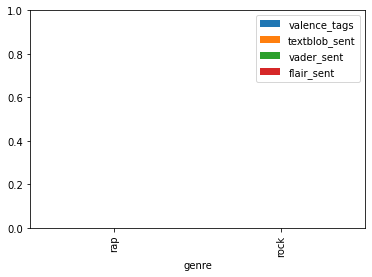

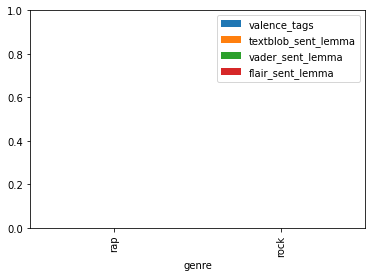

In [111]:
genre_table.plot(ylim= (0,1), x="genre", y = ['valence_tags','textblob_sent','vader_sent','flair_sent'], kind = 'bar')
genre_table.plot(ylim= (0,1), x="genre", y = ['valence_tags','textblob_sent_lemma','vader_sent_lemma','flair_sent_lemma'], kind = 'bar')

In [110]:
#normalize df sentiment columns to [0-1]
normalized_df = df.copy()
columns = ['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']
for column in columns:#min max normalization of sentiments
    normalized_df[column] = (df[column] - df[column].min())/(df[column].max()-df[column].min())

normalized_df

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,0.523665,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,,,NaN,NaN,1.0,NaN,NaN,NaN
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,0.421723,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,,,NaN,NaN,0.0,NaN,NaN,NaN
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,0.345267,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,,,NaN,NaN,0.5,NaN,NaN,NaN
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,0.766999,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,,,NaN,NaN,0.5,NaN,NaN,NaN
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,0.429148,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,,,NaN,NaN,0.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,0.623180,3.450000,5.330000,NaN,NaN,NaN,,,NaN,NaN,0.5,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,0.675108,4.132254,5.570563,NaN,NaN,progressive rock,,,NaN,NaN,0.5,NaN,NaN,NaN
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,0.623180,3.450000,5.330000,NaN,NaN,NaN,,,NaN,NaN,0.5,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,0.623180,3.450000,5.330000,NaN,NaN,NaN,,,NaN,NaN,0.5,NaN,NaN,NaN
